# Project 2 Dicoding Machine Learning Terapan: Music Recommendation System
### Nama: Junathan Richie
### Email: jonathanrichie05@gmail.com
### Username: junathan_richie_NU9i

### Importing Data

In [48]:
!kaggle datasets download joebeachcapital/30000-spotify-songs

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs
License(s): DbCL-1.0
30000-spotify-songs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!unzip -o 30000-spotify-songs.zip

Archive:  30000-spotify-songs.zip
  inflating: readme.md               
  inflating: spotify_songs.csv       


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
raw_data = pd.read_csv("spotify_songs.csv")
raw_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Karena keterbatasan RAM dalam komputasi, maka data yang diambil hanya 15000 lagu dengan track_popularity tertinggi.

In [51]:
raw_data = raw_data.sort_values(by="track_popularity", ascending=False)
raw_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,209438
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,1RvuWdj9YsXn4cMMLXr85Z,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,2aEyBG1K73KtNscS50y4aO,Hot Rocks 1964-1971,1971-12-20,Classic Hard Rock,1gAeQGQ7hr2q7IYmaejDW6,rock,...,9,-8.649,1,0.0481,0.000324,0.174000,0.1020,0.8540,135.595,222800
4977,5mIrFiQO3VwnMK4GAyJOfr,Stone,JOY.,0,1ysNmx1dAvavHHhYE9CtnI,Stone,2014-10-28,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,pop,...,6,-11.940,1,0.0592,0.095700,0.002820,0.0975,0.0936,124.880,230113
4975,0xRrshu5CURGo859MmCvWf,Walk Away,LANY,0,4JjVMXIedbfnbTENY1P5Ij,Hot Lights,2014-04-22,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,pop,...,10,-9.649,1,0.0342,0.264000,0.000418,0.1030,0.2680,85.306,231692
11326,4nLuHzKM936R5IDgVwuDh7,The Back Seat Of My Car,Paul McCartney,0,4FqFaw9BTntS6dZkk0PNe4,Wingspan (UK Version),2001-05-07,The Black Album,0KNLLunbFh9XgitPMOGmQg,rock,...,10,-9.348,1,0.0323,0.714000,0.003310,0.6170,0.4820,163.205,268533


In [52]:
raw_data = raw_data.head(15000).reset_index(drop=True)
raw_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
1,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
2,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
3,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
4,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0Se3MuBIM5Mu12Tv9M6Ajc,Pretty Girl - Remix,Dyablo,48,6VyyI30GwUCrohLifMpS0h,Destrukxion,2001,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,...,4,-7.473,0,0.2100,0.12800,0.000000,0.0720,0.654,88.011,265347
14996,7K4qs6xArR9izybon4i4gW,Somebody,Erlandsson,48,0qICWLER97fV8ZQM3lGWaG,Somebody,2019-10-11,New House ‍,54XvQQsViMBwjO1ws2o2wx,edm,...,0,-3.141,1,0.0404,0.20100,0.000000,0.2800,0.308,124.983,159423
14997,3twQx3psUMJKj4wna5d1zU,Trap Queen,Fetty Wap,48,67ji7he2Wbq7qjF2SeowDz,Trap Queen,2014-12-15,BALLARE - رقص,1CMvQ4Yr5DlYvYzI0Vc2UE,pop,...,7,-3.803,1,0.1280,0.02440,0.000000,0.3540,0.817,148.075,222093
14998,4rPNlXjFSkaZF1tnjdV04C,"Play - B2A, Anklebreaker & Tungevaag Remix",K-391,48,2k2ek2XNuypU3eZIMcfSGc,"Play (Remixes, Vol. 1)",2019-10-04,Hands Up‏‏​​ ‍,1lSdljPk8zcAdXVMUduDia,edm,...,6,-7.721,0,0.0660,0.00766,0.000141,0.1400,0.291,148.702,162787


### Data Understanding

Keterangan Data dari kaggle:
- track_id: id unik dari lagu
- track_name: nama lagu
- track_artist: artis
- track_popularity: popularitas lagu dari range 1-100
- track_album_id: id unik dari album lagu
- track_album_name: nama dari album lagu
- track_album_release_date: tanggal rilis album
- playlist_name: nama dari playlist
- playlist_id: id playlist
- playlist_genre: genre dari playlist
- playlist_subgenre: subgenre dari playlist
- danceability: seberapa cocok sebuah lagu untuk ditarikan berdasarkan tempo, ritme, ketukan, dan lainnya. Nilai 1.0 berarti paling dapat ditarikan sedangkan 0.0 berarti tidak dapat ditarikan
- energy: energi diukur dalam rentang 0.0 hingga 1.0. Lagu yang energik terasa cepat, keras, dan berisik. Lagu dengan nilai energy tinggi seperti lagu death metal dan lagu dengan nilai energy rendah seperti Bach prelude.
- key: estimasi kunci keseluruhan track yang dipetakan dalam integer seperti 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya.
- loudness: kekerasan suara dari rata-rata seluruh track. Dalam rentang -60dB hingga 0dB.
- mode: menunjukkan modality (mayor atau minor) dari lagu. Mayor dilambangkan dengan 1 dan minor dilambangkan dengan 0.
- speechiness: menunjukkan seberapa banyak kata-kata yang diucapkan dalam track pada rentang 0.0 hingga 1.0. Semakin dekat dengan nilai 1.0 berarti semakin banyak kata yang diucapkan sehingga track itu mungkin saja sebuah podcast, audiobook, dan sebagainya. Nilai di atas 0,66 menggambarkan track yang mungkin seluruhnya terdiri dari kata-kata yang diucapkan. Nilai antara 0,33 dan 0,66 menggambarkan track yang mungkin berisi musik dan ucapan, baik dalam beberapa bagian atau berlapis, termasuk kasus seperti musik rap. Nilai di bawah 0,33 kemungkinan besar mewakili musik dan track lain yang tidak ada ucapan.
- acousticness: ukuran kepercayaan apakah sebuah lagu akustik, nilai 1.0 berarti sangat diyakini bahwa lagu itu adalah lagu akustik.
- instrumentalness: ukuran kepercayaan apakah sebuah lagu bersifat non-vocal (hanya instrumental). Semakin  mendekati nilai 1.0 berarti semakin diyakini bahwa track tersebut adalah instrumental
- liveness: liveness mendeteksi apakah ada penonton pada track itu. Apabila ada penonton, maka track tersebut cenderung dibuat secara live. Nilai di atas 0.8 menunjukkan bahwa sangat diakini bahwa track tersebut dibuat secara live.
- valence: digunakan untuk mengukur tingkat musical positiveness dari sebuah track. Track dengan nilai valence tinggi menunjukkan track terdengar positive (happy, cheerful) sedangkan nilai valence rendah menunjukkan track memiliki terdengar negative.
- tempo: perkiraan tempo dari keseluruhan track dalam BPM (beats per minute)
- duration_ms: durasi lagu dalam milliseconds

#### Explaratory Data Analysis

In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  15000 non-null  object 
 1   track_name                15000 non-null  object 
 2   track_artist              15000 non-null  object 
 3   track_popularity          15000 non-null  int64  
 4   track_album_id            15000 non-null  object 
 5   track_album_name          15000 non-null  object 
 6   track_album_release_date  15000 non-null  object 
 7   playlist_name             15000 non-null  object 
 8   playlist_id               15000 non-null  object 
 9   playlist_genre            15000 non-null  object 
 10  playlist_subgenre         15000 non-null  object 
 11  danceability              15000 non-null  float64
 12  energy                    15000 non-null  float64
 13  key                       15000 non-null  int64  
 14  loudne

Berdasarkan info tersebut, tipe data dari data adalah object, int64, dan float64. Data object ini berarti data yang berupa kategorial dan harus dikodekan nantinya.

In [54]:
raw_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,64.80440,0.661734,0.681752,5.380667,-6.540968,0.573200,0.107860,0.191325,0.051966,0.183591,0.520899,120.824316,219531.961067
std,10.79468,0.146650,0.177892,3.621653,2.916434,0.494629,0.101604,0.223007,0.177958,0.145301,0.227862,27.848624,53038.478476
min,48.00000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022800,0.000002,0.000000,0.015000,0.000010,37.114000,45000.000000
25%,56.00000,0.567000,0.567000,2.000000,-7.875250,0.000000,0.040900,0.023600,0.000000,0.093100,0.346000,98.012000,186107.000000
50%,63.00000,0.679000,0.704000,6.000000,-5.960000,1.000000,0.063400,0.101000,0.000004,0.125000,0.522000,120.032000,212449.500000
75%,72.00000,0.769000,0.817000,9.000000,-4.566750,1.000000,0.132000,0.284000,0.000800,0.233250,0.699000,136.043750,244874.000000
max,100.00000,0.979000,1.000000,11.000000,0.551000,1.000000,0.918000,0.986000,0.994000,0.996000,0.990000,214.047000,517810.000000


Hasil dari describe tidak menunjukkan adanya keanehan pada data.

Banyak track pada data: 11494
Banyak artis pada data: 4464
Banyak album pada data: 9355


<ipython-input-55-3ca7e292499a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kategori", y="Jumlah", data=data, palette="pastel", legend=False)


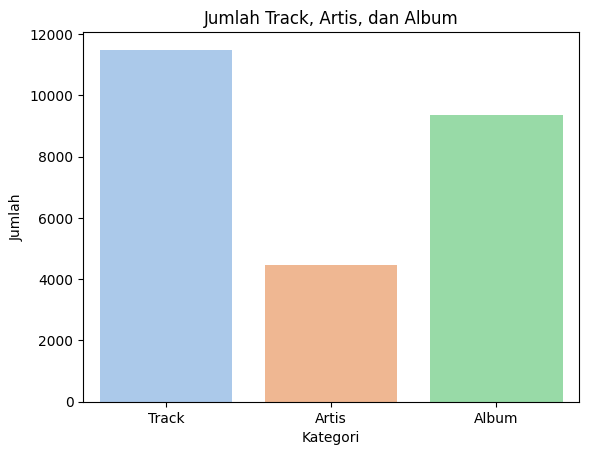

In [55]:
jumlah_track = len(raw_data.track_id.unique())
jumlah_artis = len(raw_data.track_artist.unique())
jumlah_album = len(raw_data.track_album_id.unique())
print(f"Banyak track pada data: {jumlah_track}")
print(f"Banyak artis pada data: {jumlah_artis}")
print(f"Banyak album pada data: {jumlah_album}")

data = pd.DataFrame({
    "Kategori": ["Track", "Artis", "Album"],
    "Jumlah": [jumlah_track, jumlah_artis, jumlah_album]
})

sns.barplot(x="Kategori", y="Jumlah", data=data, palette="pastel", legend=False)
plt.title("Jumlah Track, Artis, dan Album")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

##### Popularity

<ipython-input-56-b21c3900caee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


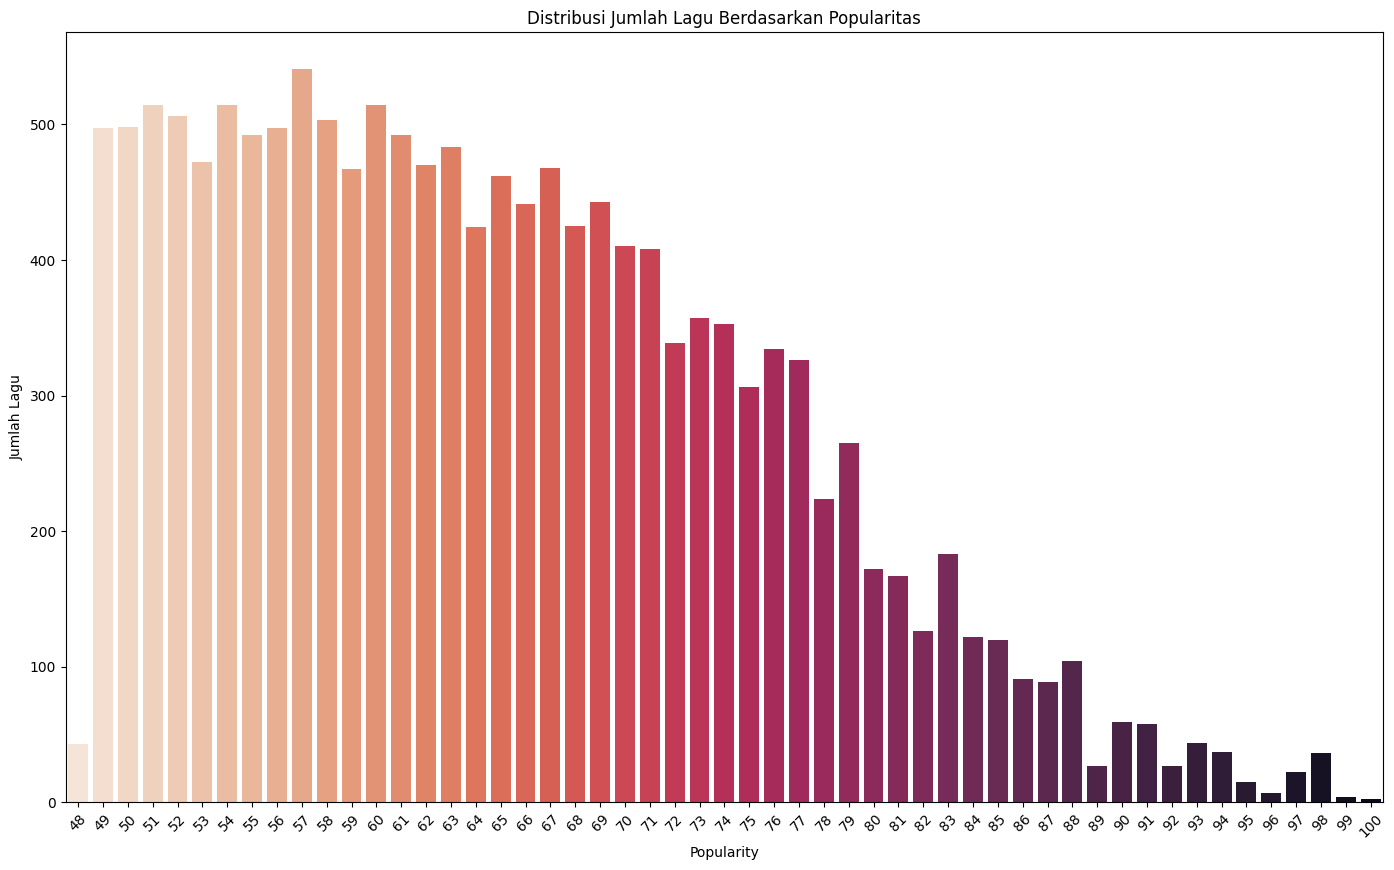

In [56]:
popularity_counts = raw_data["track_popularity"].value_counts().reset_index()
popularity_counts.columns = ["popularity", "count"]

# Plot
plt.figure(figsize=(17, 10))
sns.barplot(
    x="popularity",
    y="count",
    data=popularity_counts.sort_values(by="popularity"),
    palette="rocket_r"
)
plt.title("Distribusi Jumlah Lagu Berdasarkan Popularitas")
plt.xlabel("Popularity")
plt.ylabel("Jumlah Lagu")
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa sebagian besar data tersebar di antara 49-71. Data dengan popularity 95 ke atas sangat sedikit.

##### Track Album Release Date

Agar EDA lebih sederhana, buat visualisasi hanya berdasarkan tahun saja.

In [57]:
def parse_date(date):
    try:
        if len(date) == 4:
            return pd.to_datetime(date, format='%Y')
        elif len(date) == 7:
            return pd.to_datetime(date, format='%Y-%m')
        elif len(date) == 20:
            return pd.to_datetime(date, format='%Y-%m-%d %H-%M-%s')
        else:
            return pd.to_datetime(date, format='%Y-%m-%d')
    except:
        print(date)
        return pd.NaT

raw_data["track_album_release_date"] = raw_data["track_album_release_date"].apply(parse_date)
raw_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
1,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
2,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
3,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
4,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0Se3MuBIM5Mu12Tv9M6Ajc,Pretty Girl - Remix,Dyablo,48,6VyyI30GwUCrohLifMpS0h,Destrukxion,2001-01-01,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,...,4,-7.473,0,0.2100,0.12800,0.000000,0.0720,0.654,88.011,265347
14996,7K4qs6xArR9izybon4i4gW,Somebody,Erlandsson,48,0qICWLER97fV8ZQM3lGWaG,Somebody,2019-10-11,New House ‍,54XvQQsViMBwjO1ws2o2wx,edm,...,0,-3.141,1,0.0404,0.20100,0.000000,0.2800,0.308,124.983,159423
14997,3twQx3psUMJKj4wna5d1zU,Trap Queen,Fetty Wap,48,67ji7he2Wbq7qjF2SeowDz,Trap Queen,2014-12-15,BALLARE - رقص,1CMvQ4Yr5DlYvYzI0Vc2UE,pop,...,7,-3.803,1,0.1280,0.02440,0.000000,0.3540,0.817,148.075,222093
14998,4rPNlXjFSkaZF1tnjdV04C,"Play - B2A, Anklebreaker & Tungevaag Remix",K-391,48,2k2ek2XNuypU3eZIMcfSGc,"Play (Remixes, Vol. 1)",2019-10-04,Hands Up‏‏​​ ‍,1lSdljPk8zcAdXVMUduDia,edm,...,6,-7.721,0,0.0660,0.00766,0.000141,0.1400,0.291,148.702,162787


<ipython-input-58-c8440bbaa1f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


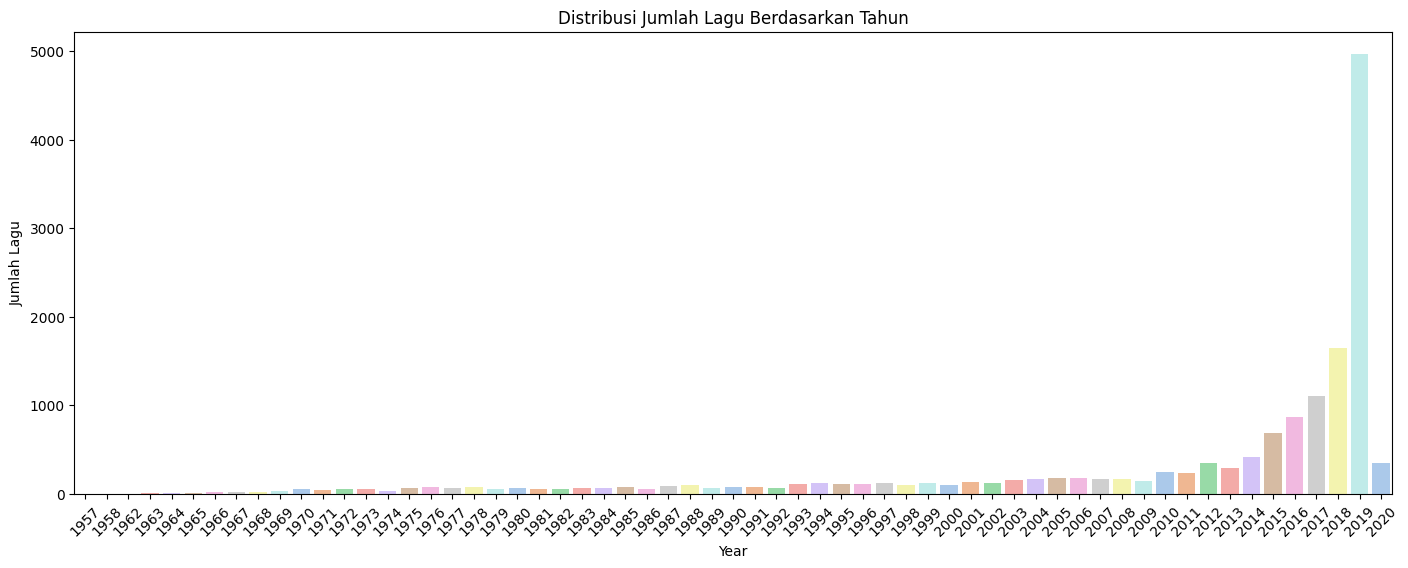

In [58]:
year_counts = raw_data.track_album_release_date.dt.year.value_counts().reset_index()
year_counts.columns = ["year", "count"]

# Plot
plt.figure(figsize=(17, 6))
sns.barplot(
    x="year",
    y="count",
    data=year_counts.sort_values(by="year"),
    palette="pastel",
)
plt.title("Distribusi Jumlah Lagu Berdasarkan Tahun")
plt.xlabel("Year")
plt.ylabel("Jumlah Lagu")
plt.xticks(rotation=45)
plt.show()

Data di atas menunjukkan sebagian besar track berada pada tahun 2015 ke atas dan terbanyak pada tahun 2019.

##### Playlist

In [59]:
jumlah_playlist = len(raw_data.playlist_id.unique())
jumlah_genre = len(raw_data.playlist_genre.unique())
jumlah_subgenre = len(raw_data.playlist_subgenre.unique())
print(f"Jumlah playlist: {jumlah_playlist}")
print(f"Contoh Nama playlist: {pd.Series(raw_data['playlist_name'].unique()).sample(5).to_list()}")
print(f"Jumlah genre: {jumlah_genre}")
print(f"Nama genre: {raw_data.playlist_genre.unique()}")
print(f"Jumlah subgenre: {jumlah_subgenre}")
print(f"Nama subgenre: {raw_data.playlist_subgenre.unique()}")

Jumlah playlist: 458
Contoh Nama playlist: ["R&B 80's/90's/00's", '80s Pop & Rock Hits and Album Tracks', '🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥', 'Latin Village 2019', 'Zona Trap']
Jumlah genre: 6
Nama genre: ['latin' 'pop' 'edm' 'r&b' 'rap' 'rock']
Jumlah subgenre: 24
Nama subgenre: ['latin hip hop' 'post-teen pop' 'pop edm' 'hip pop' 'urban contemporary'
 'reggaeton' 'latin pop' 'trap' 'dance pop' 'hip hop' 'indie poptimism'
 'gangster rap' 'electropop' 'permanent wave' 'big room' 'electro house'
 'neo soul' 'tropical' 'southern hip hop' 'album rock'
 'progressive electro house' 'hard rock' 'classic rock' 'new jack swing']


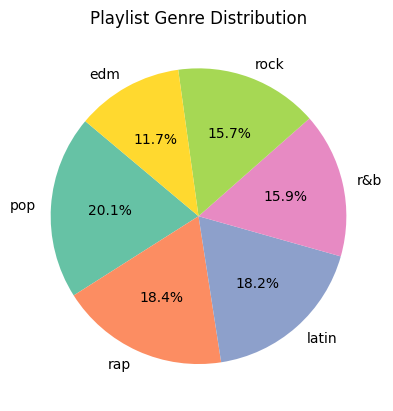

In [60]:
genre_counts = raw_data.playlist_genre.value_counts().reset_index()
genre_counts.columns = ["genre", "count"]
plt.pie(genre_counts["count"], labels=genre_counts["genre"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Playlist Genre Distribution')
plt.show()

Perbandingan Genre terlihat didominasi oleh lagu pop. Lagu edm menjadi lagu dengan distribusi paling rendah.

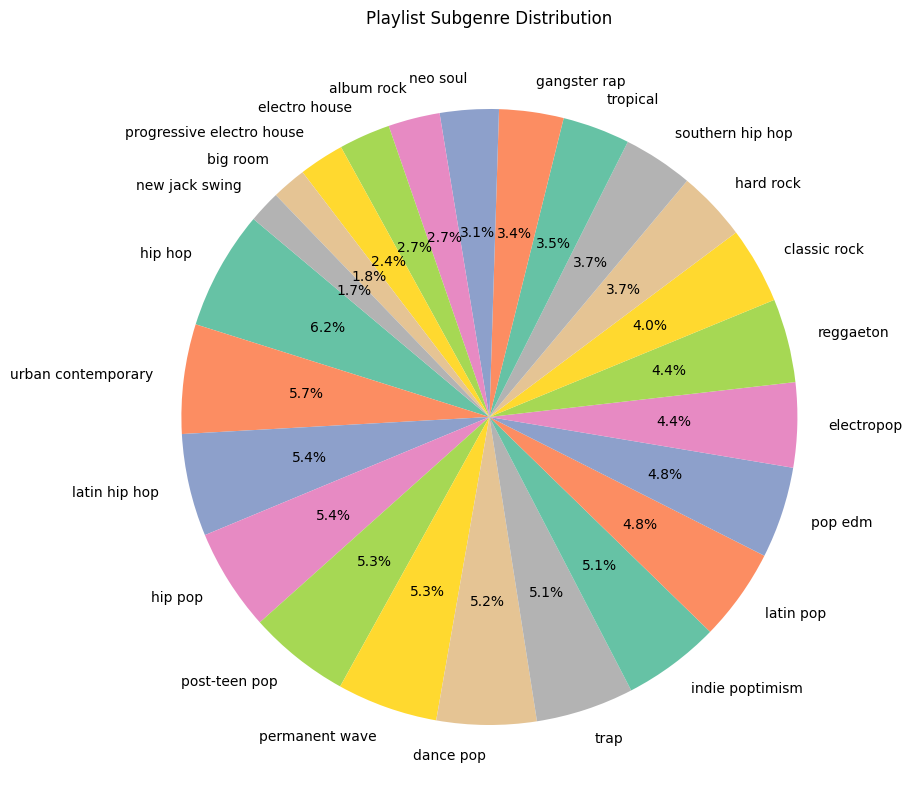

In [61]:
subgenre_counts = raw_data.playlist_subgenre.value_counts().reset_index()
subgenre_counts.columns = ["subgenre", "count"]
# Plot
plt.figure(figsize=(10, 10))
plt.pie(subgenre_counts["count"], labels=subgenre_counts["subgenre"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Playlist Subgenre Distribution')
plt.show()

Sub-genre didominasi track-track seperti hip hop, urban contemporary, dan jenis-jenis pop. Sub-genre new jack swing dan big room memiliki pembagian paling kecil.

##### Duration

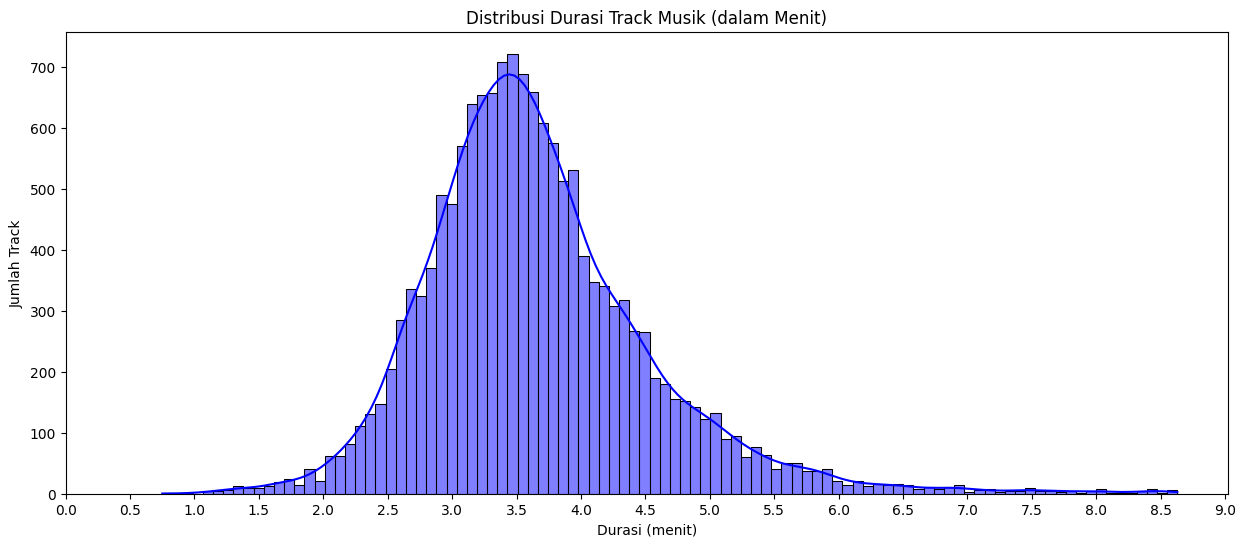

In [62]:
raw_data['duration_min'] = raw_data['duration_ms'] / (1000 * 60)

plt.figure(figsize=(15, 6))
sns.histplot(raw_data['duration_min'], bins=100, kde=True, color='blue')
plt.title('Distribusi Durasi Track Musik (dalam Menit)')
plt.xlabel('Durasi (menit)')
plt.xticks(ticks=np.arange(0, raw_data['duration_min'].max()+0.5, 0.5))
plt.ylabel('Jumlah Track')
plt.show()

Sebagian besar track berada pada durasi 3-4 menit

##### Key

   key  count
0   C#   1869
1    C   1613
2    G   1438
3    A   1376
4    B   1345
5    F   1253
6   F#   1228
7    D   1222
8   G#   1205
9   A#   1076
10   E    994
11  D#    381


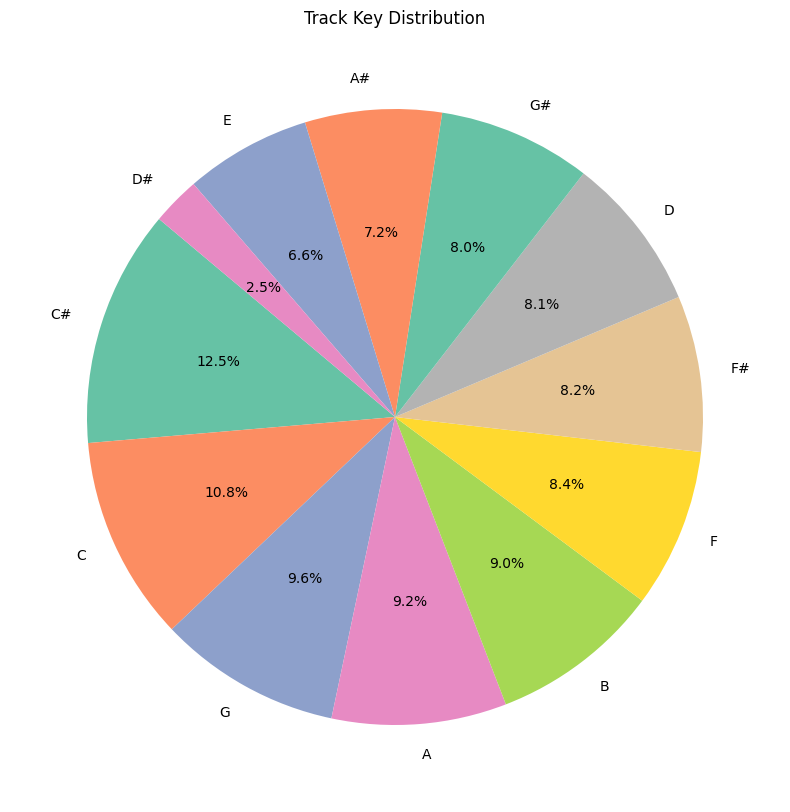

In [63]:
key_counts = raw_data.key.value_counts().reset_index()
key_counts.columns = ["key", "count"]
# Mapping key agar hasil semakin dapat dalam bentuk key sebenarnya
key_counts["key"] = key_counts["key"].map({
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
})
print(key_counts)
plt.figure(figsize=(10, 10))
plt.pie(key_counts["count"], labels=key_counts["key"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Track Key Distribution')
plt.show()

Nada dasar C, C#, dan G menjadi nada dasar yang paling banyak digunakan dalam track lagu. Nada D# menjadi nada dasar yang paling sedikit digunakan. Hal ini menunjukkan distribusi preferensi kunci dari komposer ketika membuat lagu.

##### Mode

    mode  count
0  Major   8598
1  Minor   6402


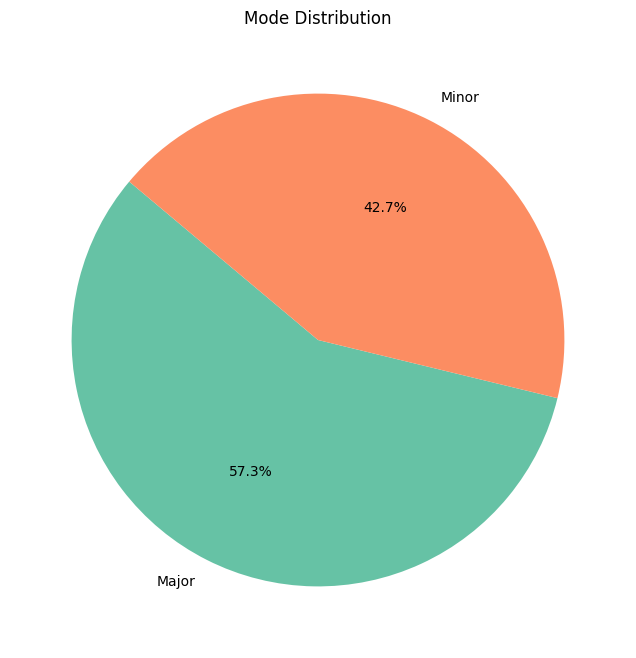

In [64]:
mode_counts = raw_data["mode"].value_counts().reset_index()
mode_counts.columns = ["mode", "count"]
# Mapping agar hasil dalam bentuk string
mode_counts["mode"] = mode_counts["mode"].map({
    0: "Minor",
    1: "Major"
})
print(mode_counts)
plt.figure(figsize=(8, 8))
plt.pie(mode_counts["count"], labels=mode_counts["mode"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Mode Distribution')
plt.show()

Mode menunjukkan lebih banyak track memiliki nada dasar major.

##### Music Characteristic

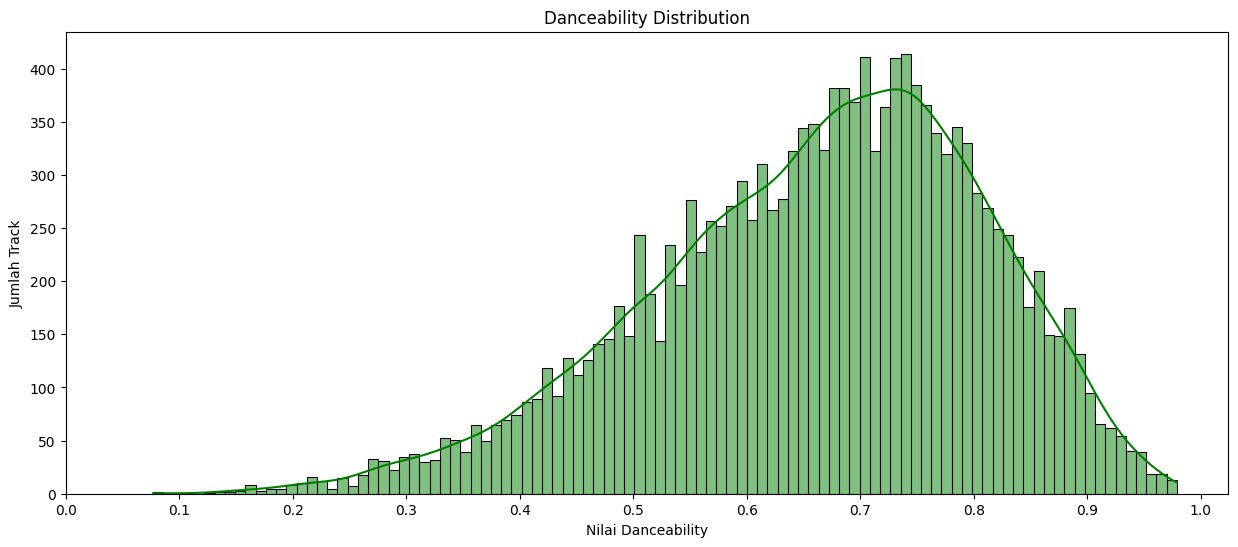

In [65]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['danceability'], bins=100, kde=True, color='green')
plt.title('Danceability Distribution')
plt.xlabel('Nilai Danceability')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Penyebaran danceability yang condong data terpusat di kanan terutama di sekitar nilai 0.6 - 0.8 atau bisa disebut _negatively skewed distribution_ menggambarkan bahwa sebagian besar track memiliki sifat danceability yang tinggi.

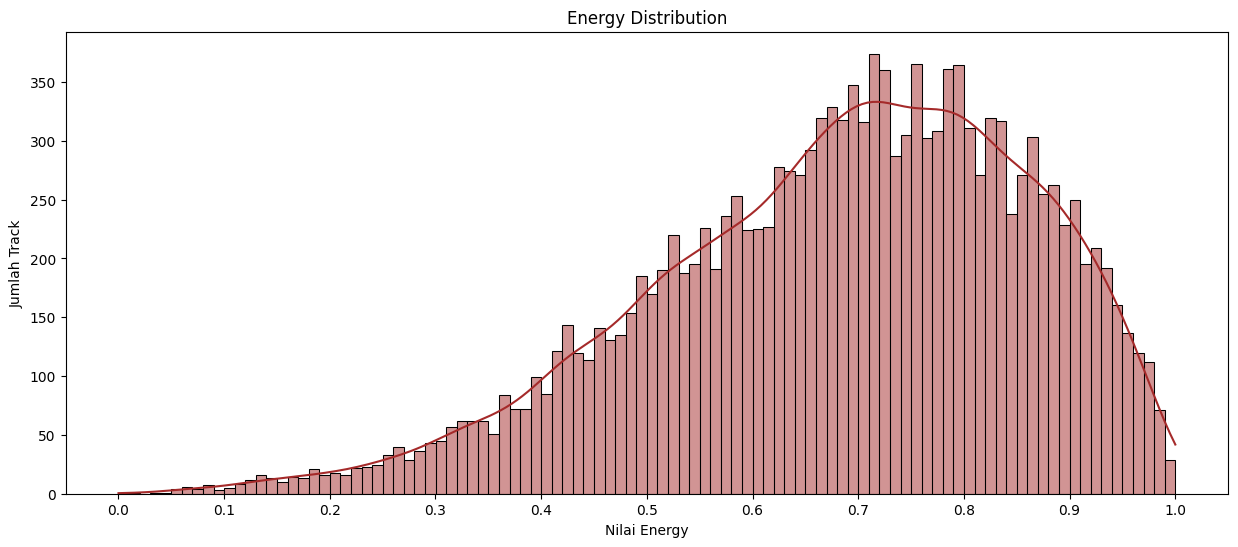

In [66]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['energy'], bins=100, kde=True, color='brown')
plt.title('Energy Distribution')
plt.xlabel('Nilai Energy')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Penyebaran energy juga berbentuk _negatively skewed distribution_ dengan data terpusat di kanan di sekitar nilai 0.6 - 0.9. Sebagian besar track memiliki nilai energy yang tinggi.

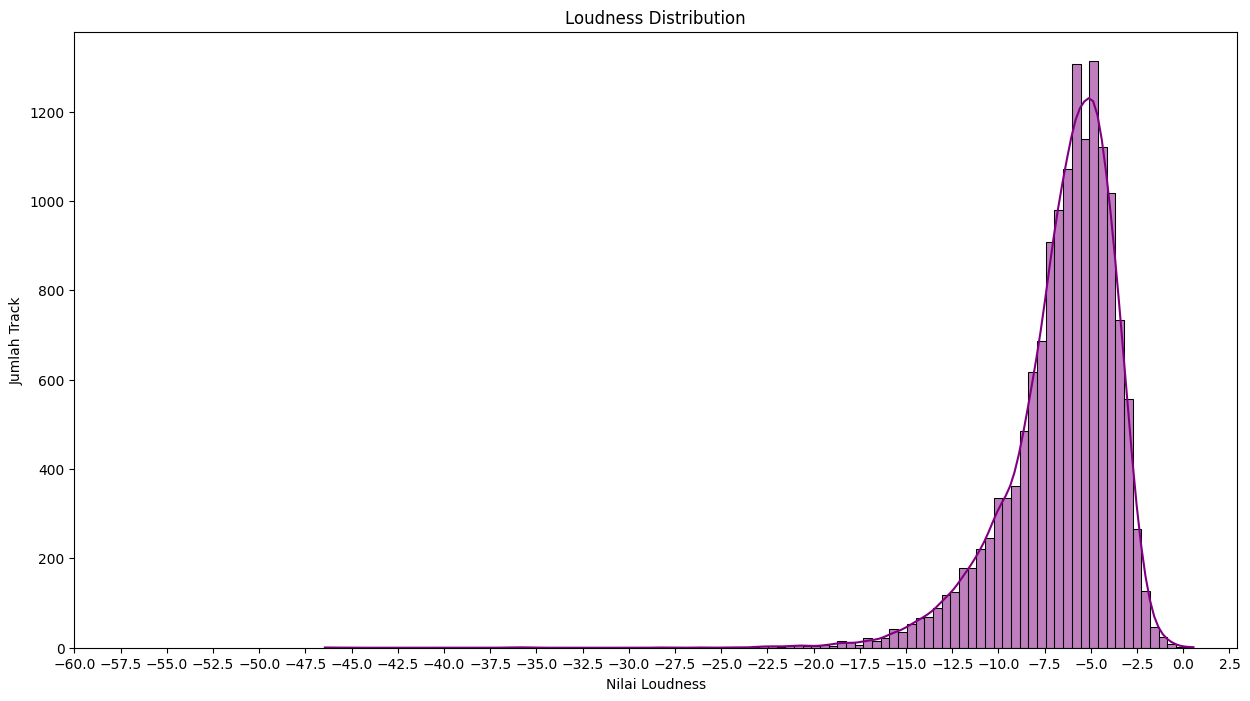

In [67]:
plt.figure(figsize=(15, 8))
sns.histplot(raw_data['loudness'], bins=100, kde=True, color='purple')
plt.title('Loudness Distribution')
plt.xlabel('Nilai Loudness')
plt.xticks(ticks=np.arange(-60, 5, 2.5))
plt.ylabel('Jumlah Track')
plt.show()

Penyebaran loudness ekstrim di daerah -7.5 - -2.5 berarti sebagian besar track memiliki tingkat suara yang keras.

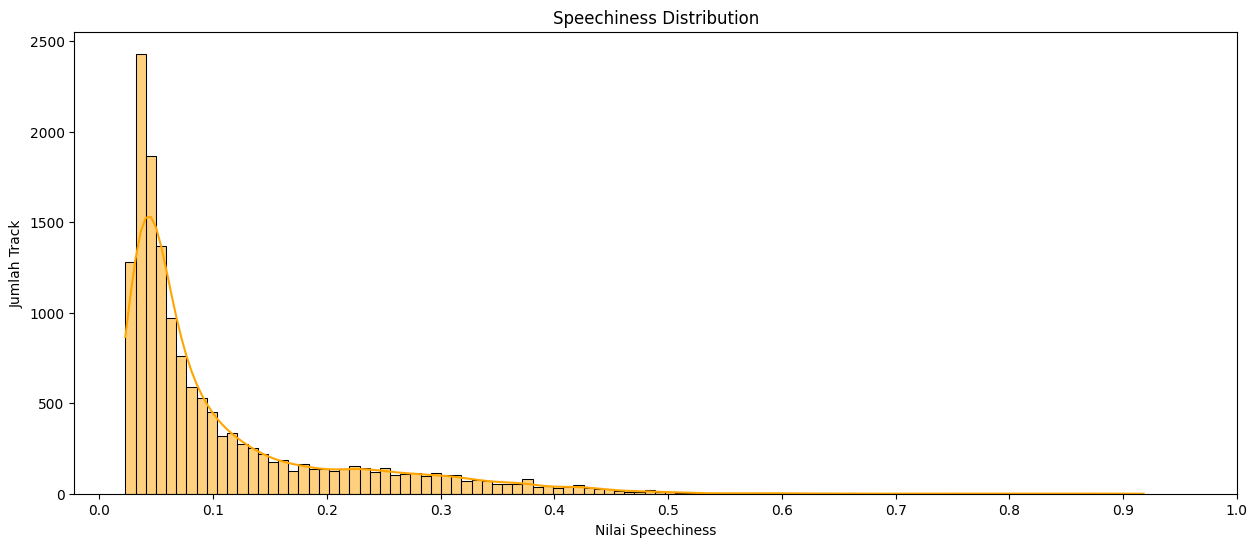

In [68]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['speechiness'], bins=100, kde=True, color='orange')
plt.title('Speechiness Distribution')
plt.xlabel('Nilai Speechiness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Penyebaran speechiness ekstrim di bagian kiri di daerah 0 hingga 0.1 yang berarti sebagian besar track dinyanyikan dan sangat sedikit kata-kata yang diucapkan dalam track tersebut.

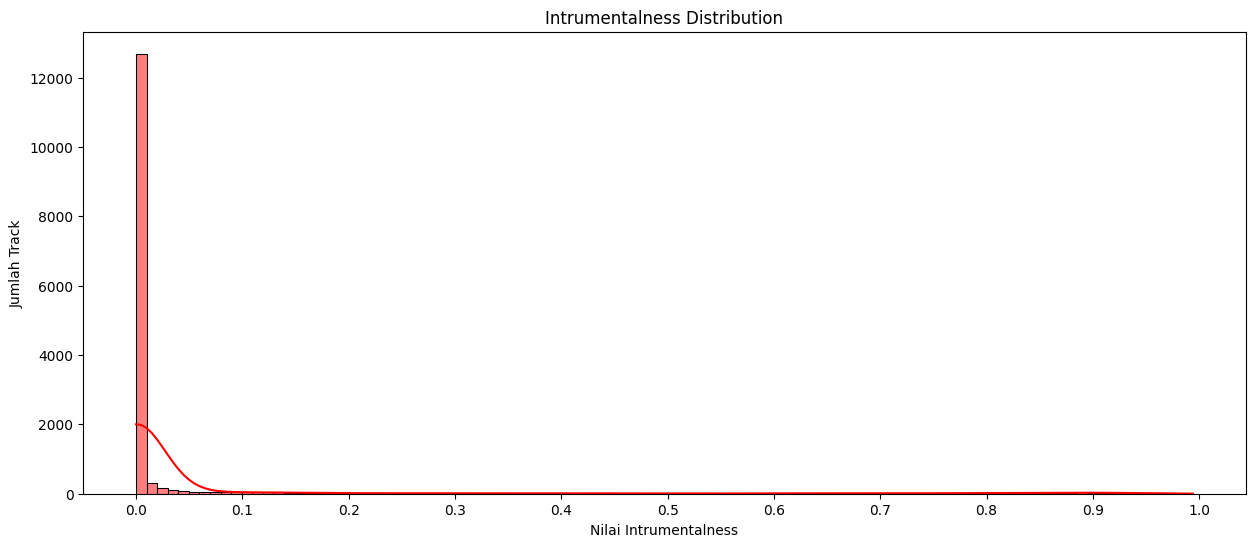

In [69]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['instrumentalness'], bins=100, kde=True, color='red')
plt.title('Intrumentalness Distribution')
plt.xlabel('Nilai Intrumentalness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Penyebaran instumentalness sangat ekstrim dengan 12000 lebih data berada di antara nilai 0.0 yang berarti lebih dari 3/4 data sangat diyakini bahwa track tersebut memiliki vocal di dalamnya.

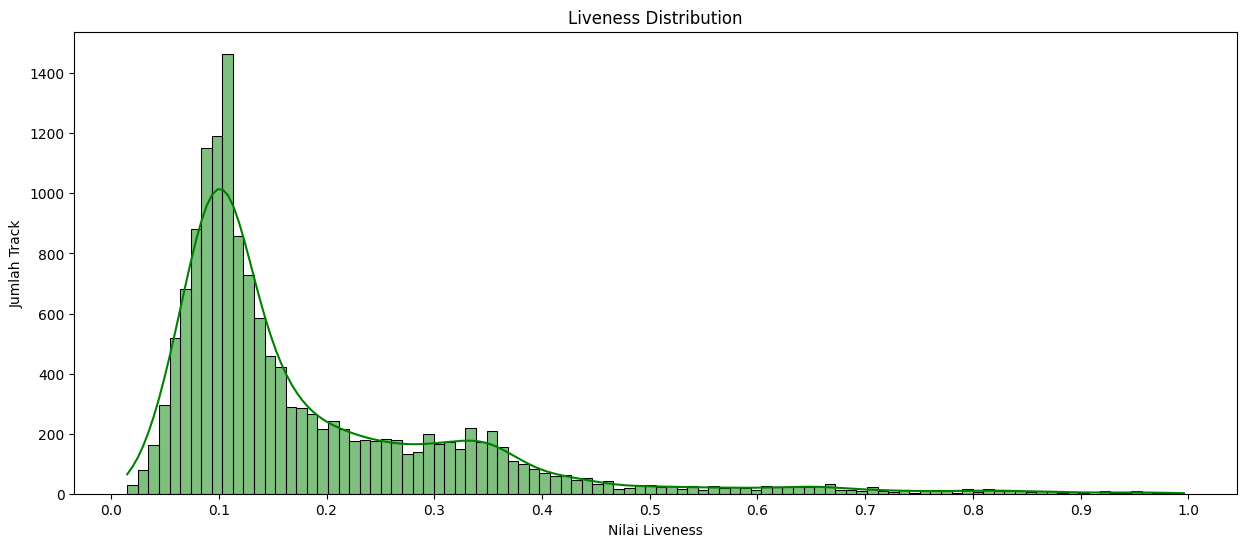

In [70]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['liveness'], bins=100, kde=True, color='green')
plt.title('Liveness Distribution')
plt.xlabel('Nilai Liveness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

  Liveness memiliki penyebaran data condong di daerah kiri di antara nilai 0.1 yang berarti sebagian besar track pada data tidak dinyanyikan secara live.

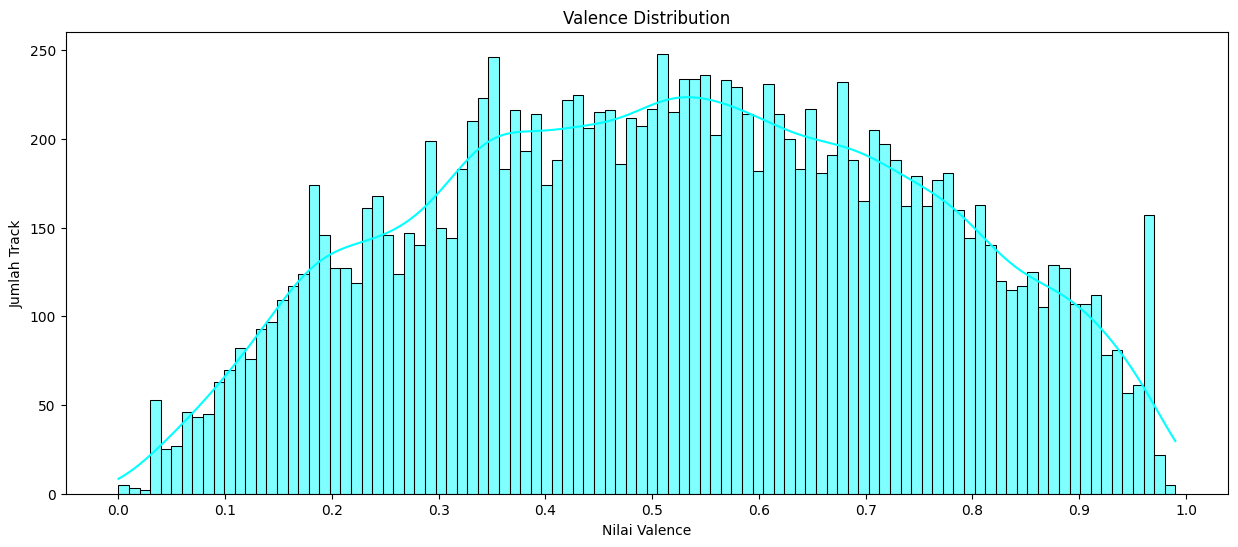

In [71]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['valence'], bins=100, kde=True, color='cyan')
plt.title('Valence Distribution')
plt.xlabel('Nilai Valence')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Valence memiliki penyebaran yang merata.

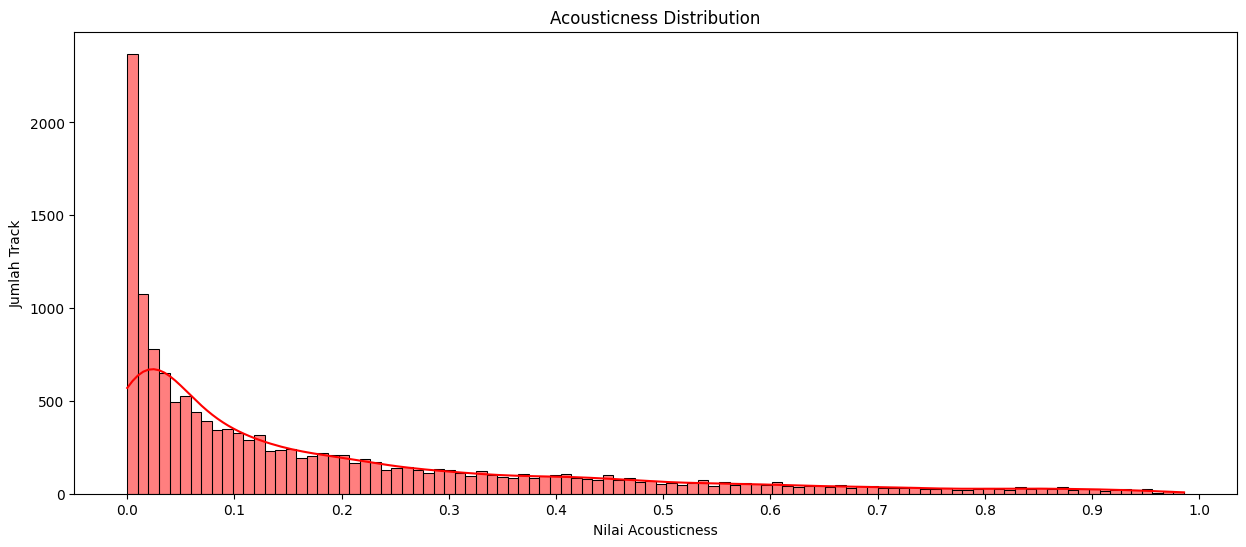

In [72]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['acousticness'], bins=100, kde=True, color='red')
plt.title('Acousticness Distribution')
plt.xlabel('Nilai Acousticness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

Acousticness memiliki penyebaran data ekstrim di sebelah kiri yang berarti sebagian besar track bukan lagu akustik.

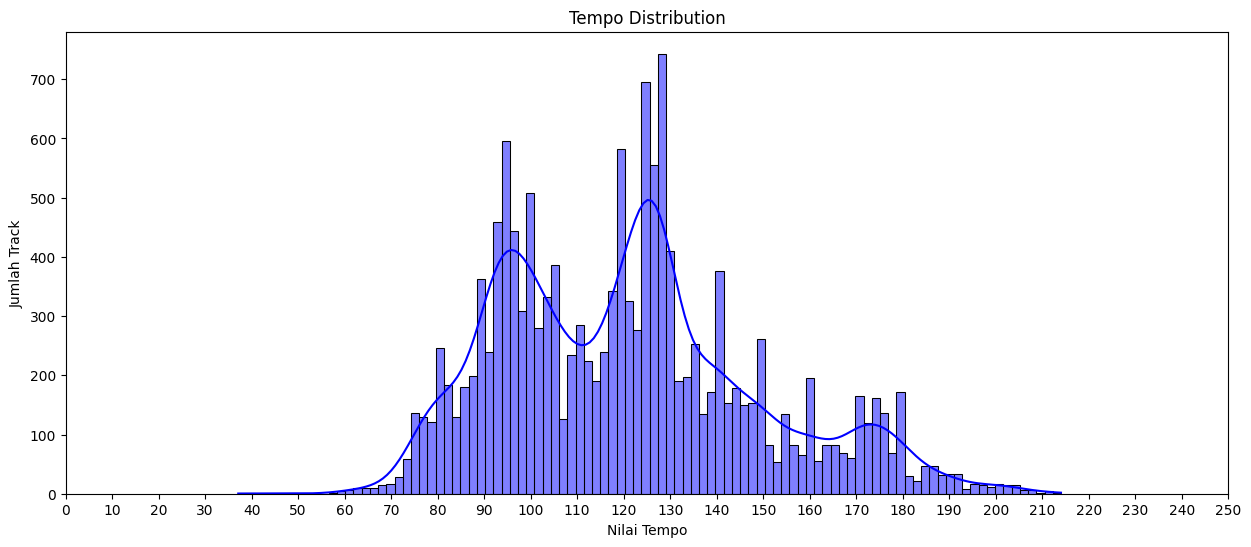

In [73]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['tempo'], bins=100, kde=True, color='blue')
plt.title('Tempo Distribution')
plt.xlabel('Nilai Tempo')
plt.xticks(np.arange(0, 260, 10))
plt.ylabel('Jumlah Track')
plt.show()

Tempo lagu tersebar cukup merata pada nilai 70-200 dan memiliki 2 puncak. Puncak pertama pada rentang data 90-100 dan puncak kedua pada rentang data 120-130.

#### Cek Missing Value

In [74]:
raw_data.isnull().sum()

,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


Tidak ada data null.

### Data Preparation

#### Pengecekan dan Drop Data Duplicate

In [75]:
duplicates_by_track_id = raw_data[raw_data.duplicated(subset=['track_id'], keep=False)]
duplicates_sorted_track_id = duplicates_by_track_id.sort_values(by='track_id')
duplicates_sorted_track_id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
9876,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,RAP Gangsta,1Z1gW89x4MSBjkvVjGg7DQ,rap,...,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893,3.798217
9572,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893,3.798217
9878,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893,3.798217
13470,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,51,6nsXqX8wZbkiqSKmSqxsuT,Hot,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,...,-3.883,1,0.1070,0.00297,0.000002,0.1200,0.664,168.015,150714,2.511900
13500,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,51,6nsXqX8wZbkiqSKmSqxsuT,Hot,2019-11-22,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,-3.883,1,0.1070,0.00297,0.000002,0.1200,0.664,168.015,150714,2.511900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,-4.755,1,0.1130,0.05120,0.000315,0.2340,0.415,127.964,204375,3.406250
8345,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Bounce United,08QTrfsYYouffgnPjmllAQ,edm,...,-4.755,1,0.1130,0.05120,0.000315,0.2340,0.415,127.964,204375,3.406250
4979,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,Latin/Hip Hop/Dancehall/Soca,2rg9LCyvaMQvnCE2hVndpR,latin,...,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943,185360,3.089333
4970,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943,185360,3.089333


Dari data di atas, terlihat bahwa track_id duplicate menunjukkan bahwa track tersebut sama. Data duplicate ini harus didrop untuk menghidari rekomendasi yang bersifat duplicate.

In [76]:
# Drop data
removed_duplicates_by_id = raw_data.drop_duplicates(subset=['track_id'], keep='first')
removed_duplicates_by_id.info()
# Check duplicates
duplicates_by_track_id = removed_duplicates_by_id[removed_duplicates_by_id.duplicated(subset=['track_id'], keep=False)]
duplicates_sorted_track_id = duplicates_by_track_id.sort_values(by='track_id')
duplicates_sorted_track_id

<class 'pandas.core.frame.DataFrame'>
Index: 11494 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  11494 non-null  object        
 1   track_name                11494 non-null  object        
 2   track_artist              11494 non-null  object        
 3   track_popularity          11494 non-null  int64         
 4   track_album_id            11494 non-null  object        
 5   track_album_name          11494 non-null  object        
 6   track_album_release_date  11494 non-null  datetime64[ns]
 7   playlist_name             11494 non-null  object        
 8   playlist_id               11494 non-null  object        
 9   playlist_genre            11494 non-null  object        
 10  playlist_subgenre         11494 non-null  object        
 11  danceability              11494 non-null  float64       
 12  energy                 

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min


Drop data berdasarkan track_id berhasil.

In [77]:
# Check duplicates berdasarkan track name dan artists
duplicates_by_track_name_and_artist = removed_duplicates_by_id[removed_duplicates_by_id.duplicated(subset=["track_name", "track_artist"], keep=False)]
duplicates_sorted = duplicates_by_track_name_and_artist.sort_values(by='track_name')
duplicates_sorted

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
11033,5FKkbyGm42hw1y08l2knlO,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,56,0aqZJlugIkTUWW1sa4BANp,Hot Rocks (1964-1971),1971-12-20,80s / Classic Rock,29dTrOurPDrMcrnio2q6hZ,rock,...,-8.673,1,0.0477,0.000287,0.150000,0.0978,0.832,135.603,222747,3.712450
2479,2PzU4IB8Dr6mxV3lHuaG34,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,76,2Q5MwpTmtjscaS34mJFXQQ,Out Of Our Heads,1965-07-30,Rock Classics,37i9dQZF1DWXRqgorJj26U,rock,...,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,136.302,222813,3.713550
5382,0YPXkQthLWrhNGoKTbwCJ8,(I Just) Died In Your Arms,Cutting Crew,68,6P6YSjfWz53suf41Bqt9BH,The Best Of Cutting Crew,1993-01-01,Dr. Q's Prescription Playlist💊,6jAPdgY9XmxC9cgkXAVmVv,pop,...,-11.209,0,0.0438,0.011900,0.000076,0.0678,0.499,124.919,278627,4.643783
4356,4ByEFOBuLXpCqvO1kw8Wdm,(I Just) Died In Your Arms,Cutting Crew,71,3wCe8HjHk6QNGcf5D3jgW1,Broadcast,1986-01-01,80's Songs | Top 💯 80s Music Hits,65HtIbyFkaQPflCa4oW8KO,pop,...,-11.402,0,0.0444,0.015800,0.000169,0.0625,0.507,124.945,280400,4.673333
4690,41SwdQIX8Hy2u6fuEDgvWr,10%,KAYTRANADA,70,5FQ4sOGqRWUA5wO20AwPcO,BUBBA,2019-12-13,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,-6.644,0,0.1230,0.026700,0.000306,0.0621,0.615,107.990,186680,3.111333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,2cDCojn6uIBM6A5xTAbl3H,m.A.A.d city,Kendrick Lamar,65,3DGQ1iZ9XKUQxAUWjfC34w,"good kid, m.A.A.d city (Deluxe)",2012-01-01,Southern California Hip Hop Primer,206vi9Q0p3juAU73flxPsz,rap,...,-6.815,1,0.2710,0.053800,0.000004,0.4400,0.217,91.048,350120,5.835333
5497,65mPCrY32YMQlBnmWVrKNa,shut up,Greyson Chance,68,51EYIcwEHs2WpaiZrrjWtT,portraits,2019-03-15,Pop Hits 2020,5TDtuKDbOhrfW7C58XnriZ,r&b,...,-4.330,1,0.0468,0.296000,0.000003,0.0683,0.450,105.006,170364,2.839400
10181,7m97u5zpSWqkDjN4uwY2LP,shut up,Greyson Chance,58,6U3xoLDkmM8QD6Zi9n6kmP,portraits,2019-03-15,The Sound of Post-Teen Pop,10FCW9lj0NdeoYI5VVvVtY,pop,...,-4.330,1,0.0468,0.296000,0.000003,0.0683,0.450,105.006,170364,2.839400
5017,2hl6q70unbviGo3g1R7uFx,Échame La Culpa,Luis Fonsi,69,2Tt0EzXpempSOIHFXVX42v,Échame La Culpa,2017-11-17,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,-3.641,1,0.0417,0.037600,0.000000,0.1370,0.675,95.989,173720,2.895333


Ternyata selain dari track_id, ada data musik yang masih sama juga berdasarkan name dan artist-nya. Maka, saya menghapus data duplicate dan mengambil data dengan popularity tertinggi.

In [78]:
# Menghapus duplikat dengan memilih track_popularity tertinggi
cleaned_data = (
    removed_duplicates_by_id.loc[
        removed_duplicates_by_id.groupby(["track_name", "track_artist"])["track_popularity"].idxmax()
    ]
).reset_index(drop=True)
duplicates_by_track_name_and_artist = cleaned_data[cleaned_data.duplicated(subset=["track_name", "track_artist"], keep=False)]
duplicates_sorted = duplicates_by_track_name_and_artist.sort_values(by='track_name')
duplicates_sorted

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min


Drop data berhasil

In [79]:
cleaned_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
0,3cRJo0hXMcrXa7oLfAUU4d,#Natural,Paty Cantú,50,6gi1JqZbK74yWCKTpiC022,#Natural,2017-10-20,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,-3.535,0,0.0568,0.114000,0.000000,0.1340,0.816,97.023,227013,3.783550
1,66DTTmu0lvfoIloKnHRxlJ,#Sádico,Rawayana,53,2DAfYtfwI4l7KkqxzG4ZSr,#Sádico,2019-06-21,Paraíso Tropical,2v41efarffe6iY8qpMK5Gj,latin,...,-10.902,1,0.1410,0.274000,0.000838,0.1020,0.716,122.006,344947,5.749117
2,66HnjBqHKWinYBFkOBJkTs,$$$ - Remix,Saramalacara,49,42mpC1T2KCU8gCSXwB8bm0,$$$ (Remix),2019-11-08,Trapperz Argentina,37i9dQZF1DWXrVH01e3PIE,rap,...,-7.802,0,0.0463,0.398000,0.000140,0.0924,0.946,139.969,123519,2.058650
3,1jBmW1fRXgLhy1XwE0SJTN,$ENHOR,FBC,55,2nVbPjjv5bDVVbetaBBVZC,PADRIM,2019-11-15,Trap Ouro,37i9dQZF1DWYBXtbGSCurj,rap,...,-4.734,1,0.3460,0.421000,0.000000,0.0893,0.335,154.928,254351,4.239183
4,6AoYWCzsDls6c61Zp5qTuU,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,69,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,2015-07-31,Hip Hop Controller,37i9dQZF1DWT5MrZnPU1zD,rap,...,-5.361,1,0.2300,0.114000,0.000000,0.2240,0.364,98.012,290836,4.847267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,37NLadlNpCObUIQa9ef1OP,Чёрный бумер,Seryoga,51,5rqT6DXG0pmw1S9kBQwY4Y,Мой двор: начало истории,2004-01-01,RUSSIAN Gangster Rap,0Jw0HckkxCfIrOvpN081eV,rap,...,-1.965,0,0.2350,0.172000,0.000000,0.2840,0.682,170.026,244349,4.072483
10945,30hzxa3MaRd2XXB6kXGlPh,完全感覚Dreamer,ONE OK ROCK,54,5Txrg948JAAstSTzI0Rssa,Nicheシンドローム,2010-06-09,ONE OK ROCK with Orchestra Japan Tour 2018 Set...,2gt9IfM8ASNiDzqg5jKyR5,rock,...,-3.395,0,0.0996,0.000191,0.000000,0.1320,0.711,94.975,252200,4.203333
10946,6Fv9M9nUKvuMD7roafIm8j,留学生,Monkey Majik,49,78Xeo0oqPIkVIPX5tEMVkB,COLLABORATED,2019-03-06,Best of 2019 Dance Pop: Japan,37i9dQZF1DXdOtZGKonFlM,pop,...,-4.768,0,0.0451,0.148000,0.000000,0.0499,0.781,120.001,214773,3.579550
10947,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,ITZY,52,2gHd5bCrj42s8nwwXBALd4,IT'z Different,2019-02-13,Best of 2019 Dance Pop: Japan,37i9dQZF1DXdOtZGKonFlM,pop,...,-4.564,0,0.0665,0.001160,0.000042,0.3290,0.713,124.998,199874,3.331233


In [80]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  10949 non-null  object        
 1   track_name                10949 non-null  object        
 2   track_artist              10949 non-null  object        
 3   track_popularity          10949 non-null  int64         
 4   track_album_id            10949 non-null  object        
 5   track_album_name          10949 non-null  object        
 6   track_album_release_date  10949 non-null  datetime64[ns]
 7   playlist_name             10949 non-null  object        
 8   playlist_id               10949 non-null  object        
 9   playlist_genre            10949 non-null  object        
 10  playlist_subgenre         10949 non-null  object        
 11  danceability              10949 non-null  float64       
 12  energy            

#### Drop Kolom Tidak Relevan

track_id tidak penting karena tidak memberikan informasi apa-apa mengenai track sehingga dapat didrop. Selain itu, data_track_album_id, playlist_id, data track_album_name dan playlist_name merupakan metadata yang tidak digunakan secara langsung pada sistem rekomendasi dan dapat didrop.

In [81]:
cleaned_data.drop(columns=['track_id','track_album_name', 'playlist_name', 'track_album_id', 'playlist_id'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_name                10949 non-null  object        
 1   track_artist              10949 non-null  object        
 2   track_popularity          10949 non-null  int64         
 3   track_album_release_date  10949 non-null  datetime64[ns]
 4   playlist_genre            10949 non-null  object        
 5   playlist_subgenre         10949 non-null  object        
 6   danceability              10949 non-null  float64       
 7   energy                    10949 non-null  float64       
 8   key                       10949 non-null  int64         
 9   loudness                  10949 non-null  float64       
 10  mode                      10949 non-null  int64         
 11  speechiness               10949 non-null  float64       
 12  acousticness      

track_popularity, liveness, duration, release_date tidak berpengaruh terhadap sebuah karakteristik musik sedangkan sistem rekomendasi yang dibuat akan berdasarkan karakteristik musik sehingga ketiga aspek ini dapat didrop.

In [82]:
cleaned_data.drop(columns=["track_popularity","liveness","duration_min","duration_ms", "track_album_release_date"], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         10949 non-null  object 
 1   track_artist       10949 non-null  object 
 2   playlist_genre     10949 non-null  object 
 3   playlist_subgenre  10949 non-null  object 
 4   danceability       10949 non-null  float64
 5   energy             10949 non-null  float64
 6   key                10949 non-null  int64  
 7   loudness           10949 non-null  float64
 8   mode               10949 non-null  int64  
 9   speechiness        10949 non-null  float64
 10  acousticness       10949 non-null  float64
 11  instrumentalness   10949 non-null  float64
 12  valence            10949 non-null  float64
 13  tempo              10949 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.2+ MB


#### Penyederhanaan Data

Ubah data yang berhubungan dengan kepercayaan seperti acousticness dan instrumentalness agar menjadi 0 dan 1.

In [83]:
cleaned_data.loc[cleaned_data["acousticness"] <= 0.5, "acousticness"] = 0
cleaned_data.loc[cleaned_data["acousticness"] > 0.5, "acousticness"] = 1
cleaned_data.loc[cleaned_data["instrumentalness"] <= 0.5, "instrumentalness"] = 0
cleaned_data.loc[cleaned_data["instrumentalness"] > 0.5, "instrumentalness"] = 1
cleaned_data

,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,#Natural,Paty Cantú,latin,latin hip hop,0.800,0.836,0,-3.535,0,0.0568,0.0,0.0,0.816,97.023
1,#Sádico,Rawayana,latin,tropical,0.805,0.622,1,-10.902,1,0.1410,0.0,0.0,0.716,122.006
2,$$$ - Remix,Saramalacara,rap,trap,0.797,0.518,1,-7.802,0,0.0463,0.0,0.0,0.946,139.969
3,$ENHOR,FBC,rap,trap,0.773,0.677,8,-4.734,1,0.3460,0.0,0.0,0.335,154.928
4,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,rap,hip hop,0.858,0.697,2,-5.361,1,0.2300,0.0,0.0,0.364,98.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,Чёрный бумер,Seryoga,rap,gangster rap,0.565,0.968,10,-1.965,0,0.2350,0.0,0.0,0.682,170.026
10945,完全感覚Dreamer,ONE OK ROCK,rock,album rock,0.558,0.914,6,-3.395,0,0.0996,0.0,0.0,0.711,94.975
10946,留学生,Monkey Majik,pop,dance pop,0.650,0.878,9,-4.768,0,0.0451,0.0,0.0,0.781,120.001
10947,달라달라 DALLA DALLA,ITZY,pop,dance pop,0.790,0.853,11,-4.564,0,0.0665,0.0,0.0,0.713,124.998


#### Standarisasi Data Numerik

Normalisasi data dari kolom numerik dengan MinMaxScaler

In [84]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo", "mode"]
scaler = MinMaxScaler()
data_normalized = cleaned_data.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data_normalized[numerical_cols])
data_normalized

,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,#Natural,Paty Cantú,latin,latin hip hop,0.801530,0.835971,0.000000,0.913062,0.0,0.037980,0.0,0.0,0.824241,0.338597
1,#Sádico,Rawayana,latin,tropical,0.807074,0.621934,0.090909,0.756314,1.0,0.132038,0.0,0.0,0.723230,0.479797
2,$$$ - Remix,Saramalacara,rap,trap,0.798204,0.517916,0.090909,0.822273,0.0,0.026251,0.0,0.0,0.955555,0.581322
3,$ENHOR,FBC,rap,trap,0.771593,0.676943,0.727273,0.887551,1.0,0.361037,0.0,0.0,0.338377,0.665868
4,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,rap,hip hop,0.865839,0.696947,0.181818,0.874210,1.0,0.231457,0.0,0.0,0.367670,0.344187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,Чёрный бумер,Seryoga,rap,gangster rap,0.540969,0.967994,0.909091,0.946467,0.0,0.237042,0.0,0.0,0.688886,0.751200
10945,完全感覚Dreamer,ONE OK ROCK,rock,album rock,0.533208,0.913985,0.545455,0.916041,0.0,0.085791,0.0,0.0,0.718179,0.327022
10946,留学生,Monkey Majik,pop,dance pop,0.635215,0.877979,0.818182,0.886827,0.0,0.024911,0.0,0.0,0.788887,0.468465
10947,달라달라 DALLA DALLA,ITZY,pop,dance pop,0.790442,0.852974,1.000000,0.891168,0.0,0.048816,0.0,0.0,0.720199,0.496708


#### Encoding Data Kategori

Kodekan data kategorial dengan One Hot Encoder. Data kategorial yang dikodekan hanya playlist_subgenre karena playlist_subgenre sudah mewakili playlist_genre dan bersifat lebih spesifik.

In [85]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(data_normalized[['playlist_subgenre']])

encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['playlist_subgenre']))

data_encoded = pd.concat([data_normalized.drop('playlist_subgenre', axis=1), encoded_df], axis=1)
data_encoded

,track_name,track_artist,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,#Natural,Paty Cantú,latin,0.801530,0.835971,0.000000,0.913062,0.0,0.037980,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#Sádico,Rawayana,latin,0.807074,0.621934,0.090909,0.756314,1.0,0.132038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,$$$ - Remix,Saramalacara,rap,0.798204,0.517916,0.090909,0.822273,0.0,0.026251,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,$ENHOR,FBC,rap,0.771593,0.676943,0.727273,0.887551,1.0,0.361037,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,rap,0.865839,0.696947,0.181818,0.874210,1.0,0.231457,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,Чёрный бумер,Seryoga,rap,0.540969,0.967994,0.909091,0.946467,0.0,0.237042,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10945,完全感覚Dreamer,ONE OK ROCK,rock,0.533208,0.913985,0.545455,0.916041,0.0,0.085791,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10946,留学生,Monkey Majik,pop,0.635215,0.877979,0.818182,0.886827,0.0,0.024911,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10947,달라달라 DALLA DALLA,ITZY,pop,0.790442,0.852974,1.000000,0.891168,0.0,0.048816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Development

In [86]:
from sklearn.metrics.pairwise import euclidean_distances
features = numerical_cols + list(encoded_df.columns)
euclidean_dist = euclidean_distances(data_encoded[features])
euclidean_sim = 1 / (1 + euclidean_dist)
euclidean_sim

array([[1.        , 0.36157329, 0.40302967, ..., 0.37756056, 0.36461074,
        0.4108236 ],
       [0.36157329, 1.        , 0.36257567, ..., 0.34336881, 0.33599485,
        0.361447  ],
       [0.40302967, 0.36257567, 1.        , ..., 0.37704308, 0.3657713 ,
        0.39873561],
       ...,
       [0.37756056, 0.34336881, 0.37704308, ..., 1.        , 0.79824121,
        0.56443413],
       [0.36461074, 0.33599485, 0.3657713 , ..., 0.79824121, 1.        ,
        0.52159808],
       [0.4108236 , 0.361447  , 0.39873561, ..., 0.56443413, 0.52159808,
        1.        ]])

In [87]:
euclidean_sim.shape

(10949, 10949)

In [88]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(data_encoded[features])
cosine_sim

array([[1.        , 0.62784331, 0.71924839, ..., 0.67930401, 0.66194426,
        0.74122375],
       [0.62784331, 1.        , 0.62587194, ..., 0.58735927, 0.58113649,
        0.62772224],
       [0.71924839, 0.62587194, 1.        , ..., 0.67360859, 0.66160429,
        0.70929622],
       ...,
       [0.67930401, 0.58735927, 0.67360859, ..., 1.        , 0.9942956 ,
        0.93112792],
       [0.66194426, 0.58113649, 0.66160429, ..., 0.9942956 , 1.        ,
        0.91046053],
       [0.74122375, 0.62772224, 0.70929622, ..., 0.93112792, 0.91046053,
        1.        ]])

In [89]:
cosine_sim.shape

(10949, 10949)

In [90]:
def get_song_recommendations(track_name, track_artist, pairwise_metrics, dataset, top_n=10):
    # Mengecek apakah kombinasi track_name dan track_artist ada dalam dataset
    track_match = dataset[
        (dataset['track_name'] == track_name) &
        (dataset['track_artist'].str.contains(track_artist, case=False))
    ]

    if track_match.empty:
        raise ValueError("Lagu tidak ditemukan atau artis tidak cocok.")

    # Mengambil indeks lagu berdasarkan kombinasi yang cocok
    track_idx = track_match.index[0]
    print(f"track_idx: {track_idx}")

    # Memastikan bahwa track_idx berada dalam rentang yang valid pada pairwise_metrics
    if track_idx >= pairwise_metrics.shape[0]:
        raise IndexError("Indeks lagu tidak valid dalam matriks kesamaan.")

    # Mendapatkan nilai similarity untuk lagu yang dimasukkan
    sim_scores = list(enumerate(pairwise_metrics[track_idx]))

    # Mengurutkan similarity dari yang tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil 10 lagu teratas kecuali lagu yang dimasukkan
    sim_scores = sim_scores[1:top_n+1]

    # Mendapatkan indeks lagu yang direkomendasikan
    song_indices = [i[0] for i in sim_scores]
    recommended_songs = dataset.iloc[song_indices].copy()
    recommended_songs.loc[:, 'similarity_score'] = [score[1] for score in sim_scores]
    # Menggabungkan hasil dalam format yang sesuai
    return recommended_songs

In [91]:
data_normalized[data_normalized["track_name"] == "Secukupnya"]

,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
8007,Secukupnya,Hindia,latin,latin pop,0.725025,0.795964,0.818182,0.879806,0.0,0.012958,0.0,0.0,0.942424,0.36676


In [92]:
input_track_name = "Secukupnya"
input_track_artist = "Hindia"
print(f"Rekomendasi lagu untuk '{input_track_name}' - {input_track_artist}:")
recommended_songs = get_song_recommendations(input_track_name, input_track_artist, euclidean_sim, data_normalized, 5)
recommended_songs

Rekomendasi lagu untuk 'Secukupnya' - Hindia:
track_idx: 8007


,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,similarity_score
1617,Chantaje (feat. Maluma),Shakira,latin,latin pop,0.859186,0.772960,0.727273,0.926126,0.0,0.061215,0.0,0.0,0.916161,0.366919,0.848345
4678,Jam,Starboy,latin,latin pop,0.729460,0.760958,0.909091,0.898508,0.0,0.030049,0.0,0.0,0.797978,0.321687,0.846174
2055,DUELE EL CORAZON,Enrique Iglesias,latin,latin pop,0.717264,0.903983,0.727273,0.916913,0.0,0.082440,0.0,0.0,0.854544,0.304550,0.837242
749,Back In The City,Alejandro Sanz,latin,latin pop,0.749418,0.753957,0.909091,0.854550,0.0,0.017538,0.0,0.0,0.861615,0.513629,0.834409
6493,No Te Veo - Digital Single,Casa De Leones,latin,latin pop,0.853642,0.872978,0.727273,0.886040,0.0,0.064343,0.0,0.0,0.975757,0.445892,0.831970


In [93]:
input_track_name = "Secukupnya"
input_track_artist = "Hindia"
print(f"Rekomendasi lagu untuk '{input_track_name}' - {input_track_artist}:")
recommended_songs = get_song_recommendations(input_track_name, input_track_artist, cosine_sim, data_normalized, 5)
recommended_songs

Rekomendasi lagu untuk 'Secukupnya' - Hindia:
track_idx: 8007


,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,similarity_score
1617,Chantaje (feat. Maluma),Shakira,latin,latin pop,0.859186,0.772960,0.727273,0.926126,0.0,0.061215,0.0,0.0,0.916161,0.366919,0.996605
4678,Jam,Starboy,latin,latin pop,0.729460,0.760958,0.909091,0.898508,0.0,0.030049,0.0,0.0,0.797978,0.321687,0.996490
6493,No Te Veo - Digital Single,Casa De Leones,latin,latin pop,0.853642,0.872978,0.727273,0.886040,0.0,0.064343,0.0,0.0,0.975757,0.445892,0.996351
5142,Lejos De Ti,Gian Marco,latin,latin pop,0.685109,0.754957,0.636364,0.842167,0.0,0.017650,0.0,0.0,0.777776,0.355519,0.996138
2055,DUELE EL CORAZON,Enrique Iglesias,latin,latin pop,0.717264,0.903983,0.727273,0.916913,0.0,0.082440,0.0,0.0,0.854544,0.304550,0.995926
